In [91]:
#고객 이탈에 여부 분류 모델
import pandas as pd
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
#데이터읽기
df=pd.read_csv(url)
df.head()
# df.columns.unique

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###  ▶ 1. 데이터 기본 정보 확인

In [24]:
df.info()  #빠진 데이터는 없는 것으로 확인됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.select_dtypes(include='object')
#object만 보게 설정했는데, TotalCharges가 숫자로 되어 있는데 object에 나왔으므로 이상한데이터가 있음을 확인 ==> Na로 바꾸기

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [ ]:
pd.to_numeric(df.TotalCharges)
#error 확인 : Unable to parse string " " at position 488 ==> 488열에 공백있음

ValueError: Unable to parse string " " at position 488

In [26]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
#errors='coerce'는 문자나 공백처럼 숫자로 바꿀 수 없는 값이 있을 때, 그 값을 자동으로 NaN(결측치) 으로 바꿔주는 옵션

In [27]:
df.TotalCharges.info()  # ==> object에서 float으로 변경함을 확인

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [31]:
# Churn 은 Yes, No 로 표기되어 있으므로, 머신러닝 학습을 위해서 숫자로 변경 필요.
# YES == 1, No == 0 로 변경
# map 또는 apply 사용
df.Churn = df.Churn.map({'Yes':1, 'No':0})
# df.Churn = df.Churn.apply(lambda x : 1 if x =='Yes' else 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### ▶ baseline 데이터 및 모델 생성

In [ ]:
# 피쳐 선택
df.select_dtypes(include=['int', 'float'])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [48]:
# 피쳐 선택 # 가정 | base : Churn을 뺀 나머지	# 정답 : Churn
base_df = df.select_dtypes(include=['int', 'float']).copy()
# df.TotalCharges의 NaN으로 된 결측치 삭제
base_df = base_df.dropna()

X = base_df.drop(columns=['Churn']).to_numpy()
y = base_df.Churn
# 학습할 때 판다스형태보다 넘파이 형태가 학습이 빠름 (X 2차원 y 1차원)
X.ndim
y.ndim

#데이터분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
#스케일링
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)
#모델
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()  #기본값이 n_neighbors= 5
#학습
knn.fit(x_train_scaled, y_train)
#평가
from sklearn.metrics import classification_report
predict =knn.predict(x_test_scaled)
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.82      0.88      0.84      1033
           1       0.57      0.45      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



In [73]:
# 상기 support 값이 다르기 때문에 클래스 불균형을 해소해보자


# 피쳐 선택 # 가정 | base : Churn을 뺀 나머지	# 정답 : Churn
base_df = df.select_dtypes(include=['int', 'float']).copy()
# df.TotalCharges의 NaN으로 된 결측치 삭제
base_df = base_df.dropna()

X = base_df.drop(columns=['Churn']).to_numpy()
y = base_df.Churn
# 학습할 때 판다스형태보다 넘파이 형태가 학습이 빠름 (X 2차원 y 1차원)
X.ndim
y.ndim

# 클래스 불균형 해소
print(y.value_counts())
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# under_sampling
# rus = RandomUnderSampler(random_state=42)
# X,y= rus.fit_resample(X,y)

# over_sampling : under_sampling 보다 over_sampling 했을 때 f1-score값이 더 좋았어서 over_sampling으로 진행
smote=SMOTE(random_state=42)
X,y=smote.fit_resample(X,y)


#데이터분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
#스케일링
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)
#모델
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()  #기본값이 n_neighbors= 5
#학습
knn.fit(x_train_scaled, y_train)
#평가
from sklearn.metrics import classification_report
predict =knn.predict(x_test_scaled)
print(classification_report(y_test, predict))


Churn
0    5163
1    1869
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1033
           1       0.77      0.78      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



In [ ]:
# 피쳐 선택 # 가정 | base : Churn을 뺀 나머지	# 정답 : Churn
base_df = df.select_dtypes(include=['int', 'float']).copy()
# df.TotalCharges의 NaN으로 된 결측치 삭제
base_df = base_df.dropna()

X = base_df.drop(columns=['Churn']).to_numpy()
y = base_df.Churn
# 학습할 때 판다스형태보다 넘파이 형태가 학습이 빠름 (X 2차원 y 1차원)
X.ndim
y.ndim

#데이터분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
#스케일링
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)
#모델
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()  #기본값이 n_neighbors= 5
#학습
knn.fit(x_train_scaled, y_train)
#평가
from sklearn.metrics import classification_report
predict =knn.predict(x_test_scaled)
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.82      0.88      0.84      1033
           1       0.57      0.45      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



### ▶ 2. 주요 특성 시각화

In [ ]:
# customerID 칼럼 삭제
df = df.drop(columns=['customerID'])

In [77]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


<Axes: xlabel='gender', ylabel='count'>

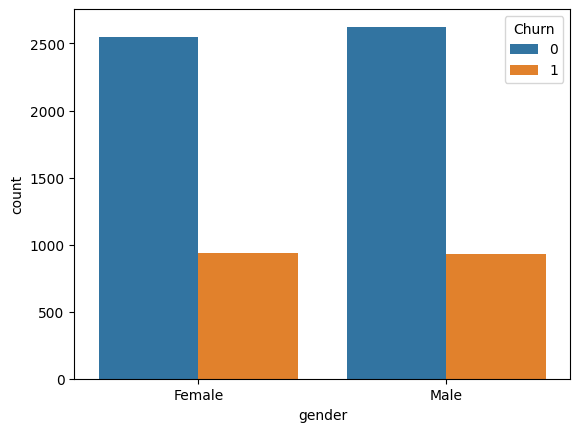

In [83]:
import seaborn as sns
#성별에 따른 이탈률
sns.countplot(data=df, x='gender', hue=df.Churn)

<Axes: xlabel='Partner', ylabel='count'>

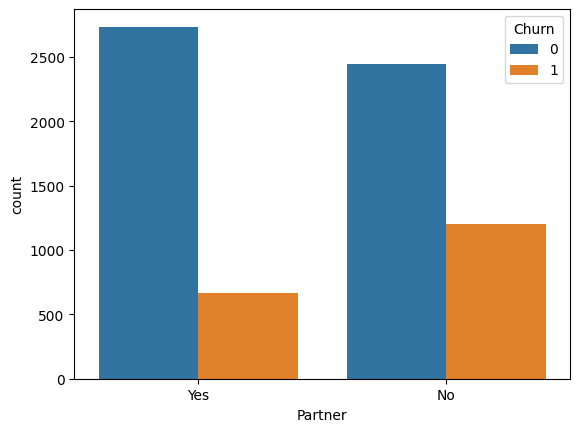

In [ ]:
sns.countplot(data=df, x='Partner', hue=df.Churn)

<Axes: xlabel='PhoneService', ylabel='count'>

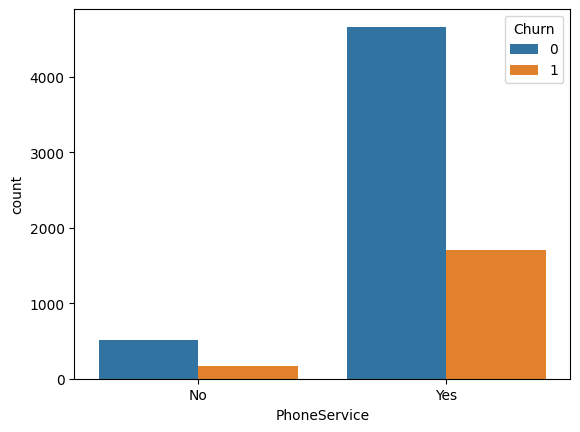

In [84]:
sns.countplot(data=df, x='PhoneService', hue=df.Churn)

In [ ]:
#차이를 보이는 Partner, Dependents,	PhoneService 컬럼을 onehot으로 변경해서 학습
df=df.dropna()
df.select_dtypes(exclude=['object'])


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [ ]:
new_df = df.copy()
new_df = new_df.dropna()

new_df.Churn = new_df.Churn.map({'Yes':1, 'No':0})
new_df.Partner =new_df.Partner.map({'Yes':1, 'No':0})
new_df.Dependents=new_df.Dependents.map({'Yes':1, 'No':0})
new_df.PhoneService =new_df.PhoneService.map({'Yes':1, 'No':0})

new_df = pd.concat([new_df,pd.get_dummies(new_df.Partner).astype(int)], axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.Dependents).astype(int)], axis=1)
new_df = pd.concat([new_df,pd.get_dummies(new_df.PhoneService).astype(int)], axis=1)

new_df.drop(columns=['Partner', 'Dependents', 'PhoneService'])

new_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,0,1,0,1,0,1
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,Electronic check,29.85,29.85,0,0,1,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Mailed check,56.95,1889.5,0,1,0,1,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,Mailed check,53.85,108.15,1,1,0,1,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,0,1,0,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,Electronic check,70.70,151.65,1,1,0,1,0,0,1


In [117]:
#학습 가능한 수치데이터
train_df = new_df.select_dtypes(include=['int', 'float'])
train_df
X=train_df.drop(columns=['Churn']).to_numpy()
y = new_df.Churn.to_numpy()


#데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2, random_state=42)

#정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train)
x_test_scaled=s.transform(x_test)

#학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

#예측/평가
from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.58      0.46      0.51       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
######################## 상기 셀에서 클래스 불균형 추가 ##############################

#학습 가능한 수치데이터
train_df = new_df.select_dtypes(include=['int', 'float'])
train_df
X=train_df.drop(columns=['Churn']).to_numpy()

#클래스 불균형 해결
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,y=smt.fit_resample(X,y)


#데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2, random_state=42)

#정규화
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train)
x_test_scaled=s.transform(x_test)

#학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

#예측/평가
from sklearn.metrics import classification_report
predict = knn.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1035
           1       0.80      0.81      0.81      1035

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



### 데이터 누수 Data Leakage
정답(ex. 상기 데이터 기준: Churn 컬럼)을 넣어서 학습을 시키면 f1-score 등이 전부 1.00 으로 나오게됨.
